In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('sklearn_data/heart-disease.csv')

In [3]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Split data

In [6]:
X = df.drop('target',axis=1)
y = df['target']

### Train test split


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

### Train model

In [9]:
from sklearn.svm import LinearSVC

In [10]:
model = LinearSVC(max_iter=3000)

In [11]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 3000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [12]:
model.fit(x_train,y_train)

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=3000)

In [13]:
model.score(x_test,y_test)

0.5573770491803278

# Cross validation

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
cross_val_score(model,X,y)

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([0.75409836, 0.7704918 , 0.80327869, 0.55      , 0.75      ])

### Try ensemble

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
model = RandomForestClassifier(n_estimators=20)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [18]:
model.score(x_test,y_test)

0.8524590163934426

*** ***
***Improve it***

In [19]:
import numpy as np

In [20]:
# np.random.seed(42)
# for i in range(10,100,5):
#     print(f"Improving model with nestimator {i}")
#     model = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
#     print(f'Model accuracy is {model.score(x_test,y_test)*100:.2f}%')

# Predict

In [21]:
model.predict(x_test)

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [22]:
np.array([y_test])

array([[0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]], dtype=int64)

In [23]:
# model.predict_proba(x_test)

In [24]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [25]:
confusion_matrix(y_test,y_pred=model.predict(x_test))

array([[25,  6],
       [ 3, 27]], dtype=int64)

In [26]:
precision_score(y_test,y_pred=model.predict(x_test))

0.8181818181818182

In [27]:
recall_score(y_test,y_pred=model.predict(x_test))

0.9

In [28]:
f1_score(y_test,y_pred=model.predict(x_test))

0.8571428571428572

### Cross validation

In [29]:
cross_val_score(model,X,y)

array([0.78688525, 0.86885246, 0.78688525, 0.8       , 0.75      ])

### Taking mean of cross val score

In [30]:
cross_val = np.mean(cross_val_score(model,X,y))

In [31]:
model.score(x_test,y_test), cross_val

(0.8524590163934426, 0.798360655737705)

### ROC curve

In [33]:
y_prob = model.predict_proba(x_test)

In [37]:
y_prob_positive = y_prob[:,1]

In [39]:
y_prob_positive[:10]

array([0.1 , 0.7 , 0.7 , 1.  , 0.05, 1.  , 0.85, 0.1 , 0.1 , 0.5 ])

In [40]:
from sklearn.metrics import roc_curve

In [41]:
fpr,tpr,threshold = roc_curve(y_test,y_prob_positive)

In [45]:
fpr

array([0.        , 0.        , 0.03225806, 0.03225806, 0.06451613,
       0.09677419, 0.12903226, 0.16129032, 0.19354839, 0.19354839,
       0.25806452, 0.32258065, 0.32258065, 0.4516129 , 0.5483871 ,
       0.80645161, 0.96774194, 1.        ])

### Visculize it 

In [46]:
import matplotlib.pyplot as plt

In [55]:
def plot_roc(fpr,tpr):
    '''Print ROC Curve for fpr and tpr'''
    plt.plot(fpr,tpr,color="orange",label = 'ROC')
    # Draw a line
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='Guessing')
    #Coustomize
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

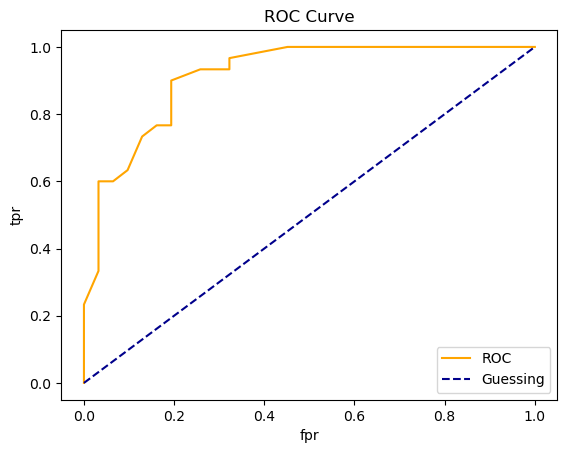

In [56]:
plot_roc(fpr,tpr)

### AUC

In [59]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_prob_positive)

0.9139784946236559

### Ideal curve looks like

In [57]:
fpr,tpr,threshold = roc_curve(y_test,y_test)

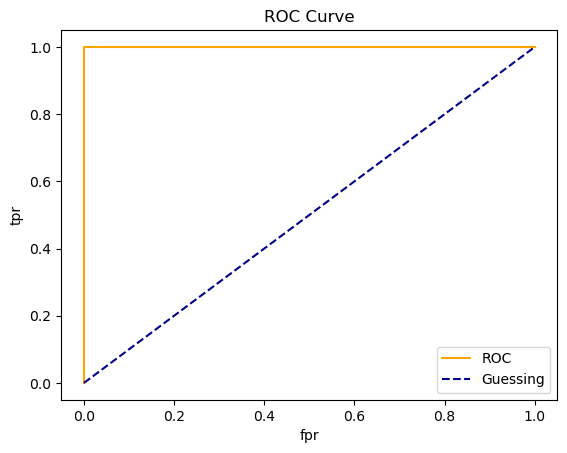

In [58]:
plot_roc(fpr,tpr)

### Ideal AUC

In [60]:
roc_auc_score(y_test,y_test)

1.0

In [62]:
y_predict = model.predict(x_test)

### Print confussion matrix

In [61]:
from sklearn.metrics import confusion_matrix

In [63]:
con_metrics = confusion_matrix(y_test,y_predict)

In [64]:
con_metrics

array([[25,  6],
       [ 3, 27]], dtype=int64)

### Let's visculize it

In [65]:
import seaborn as sns

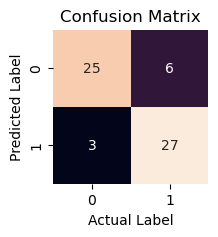

In [74]:
plt.subplots(figsize=(2,2))
sns.heatmap(con_metrics,cbar=False,annot=True)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()

### Plot confusion matrix

In [75]:
from sklearn.metrics import plot_confusion_matrix

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


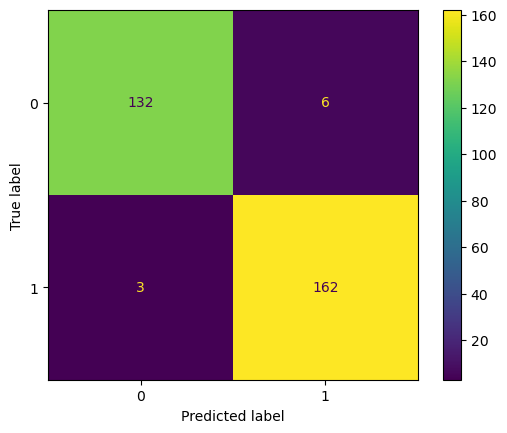

In [77]:
plot_confusion_matrix(model,X,y)
plt.show()